<a href="https://colab.research.google.com/github/arvindnswamy/RemoteSensing/blob/development/ExtractingHistogramOfNDWIfromLandsatInEarthEngine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import ee
from IPython.display import Image

# Trigger the authentication flow.
ee.Authenticate()


To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=D1fSpJfiB40E8LfaX75mdGry886VEiWxMXGYUxxyI5I&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/0QHUj-_x_uRoFd9B_CLf5__63toO36-UhDcYbD6XiFQIlrDj55yCGbk

Successfully saved authorization token.


In [0]:
ee.Initialize()
image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318') # SF Bay area again

ndwi = image.normalizedDifference(['B3', 'B6'])  #Compute ND water index

(array([216., 267., 111.,  40.,   4.,   2.,   2.,   3.,  55., 299.]),
 array([-0.56886339, -0.41586557, -0.26286774, -0.10986992,  0.0431279 ,
         0.19612572,  0.34912355,  0.50212137,  0.65511919,  0.80811702,
         0.96111484]),
 <a list of 10 Patch objects>)

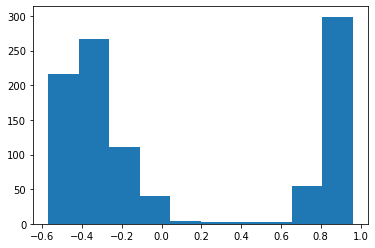

In [4]:
'''
This is a procedure to extract some numerical information from the image.
'''

ndwi_dict = ndwi.sample(numPixels = 1000).reduceColumns(ee.Reducer.toList().repeat(1), ['nd'])
ndwi_list = ee.List(ndwi_dict.get('list'))
ndwi_data = ndwi_list.getInfo()

import matplotlib.pyplot as plt
plt.hist(ndwi_data[0])

In [0]:
imagePath45Row34 = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_045034_20140629') #Image of region adjacent to SF Bay area
#I got the name of this image from the code in the next cell
ndwiPath45Row34 = imagePath45Row34.normalizedDifference(['B3', 'B6'])  #Compute ND water index

In [5]:
parameters = {'min': 0,
              'max': 0.2,
              'dimensions': 768,
              'bands': ['B4', 'B3', 'B2']
}

'''
It turns out that the min and max values are extremely important. Previously, I used the max value of 255 and
higher values, thinking that the max would refer to the DN value of the image I download from USGS. Apparently
not. Instead, when I decreased the value to 1.0 and smaller, I started getting images that are actually visible. 
The max value almost seems like a contrast stretching tool - you've seen contrast stretching in action with GIMP.
When you have max = 0.2, you get a pretty nice image, as shown below.
'''

print(type(imagePath45Row34.getThumbUrl(parameters))) #Image takes a string poining to an image and displays it
print(imagePath45Row34.getThumbUrl(parameters))
Image(url = imagePath45Row34.getThumbUrl(parameters))

<class 'str'>
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/dc65e3c592119026f64e49bfe7a22275-9a9a9682733d91ce2643a95d49764428:getPixels


In [0]:
'''
This is used to return the names of the images of the region of interest within a time frame of interest.
I chose a single month (June 2014) so that I'll have two images at best.
'''
Path45Row34_collect_return = ee.ImageCollection('LANDSAT/LC08/C01/T1').filter(ee.Filter.eq('WRS_PATH', 45)).filter(ee.Filter.eq('WRS_ROW', 34)).filterDate('2014-06-01', '2014-06-30')
Path12Row32_collect_return = ee.ImageCollection('LANDSAT/LC08/C01/T1').filter(ee.Filter.eq('WRS_PATH', 12)).filter(ee.Filter.eq('WRS_ROW', 32)).filterDate('2014-05-01', '2014-06-30')

In [0]:
Path12Row32_collect_return.getInfo()

{'bands': [],
 'features': [{'bands': [{'crs': 'EPSG:32619',
     'crs_transform': [30, 0, 142485, 0, -30, 4588215],
     'data_type': {'max': 65535,
      'min': 0,
      'precision': 'int',
      'type': 'PixelType'},
     'dimensions': [7891, 8011],
     'id': 'B1'},
    {'crs': 'EPSG:32619',
     'crs_transform': [30, 0, 142485, 0, -30, 4588215],
     'data_type': {'max': 65535,
      'min': 0,
      'precision': 'int',
      'type': 'PixelType'},
     'dimensions': [7891, 8011],
     'id': 'B2'},
    {'crs': 'EPSG:32619',
     'crs_transform': [30, 0, 142485, 0, -30, 4588215],
     'data_type': {'max': 65535,
      'min': 0,
      'precision': 'int',
      'type': 'PixelType'},
     'dimensions': [7891, 8011],
     'id': 'B3'},
    {'crs': 'EPSG:32619',
     'crs_transform': [30, 0, 142485, 0, -30, 4588215],
     'data_type': {'max': 65535,
      'min': 0,
      'precision': 'int',
      'type': 'PixelType'},
     'dimensions': [7891, 8011],
     'id': 'B4'},
    {'crs': 'EPSG:326

(array([1.210e+02, 1.470e+02, 8.800e+01, 2.100e+01, 1.560e+02, 4.222e+03,
        4.761e+03, 4.570e+02, 4.000e+00, 4.000e+00]),
 array([-0.57072189, -0.41931567, -0.26790945, -0.11650324,  0.03490298,
         0.18630919,  0.33771541,  0.48912163,  0.64052784,  0.79193406,
         0.94334028]),
 <a list of 10 Patch objects>)

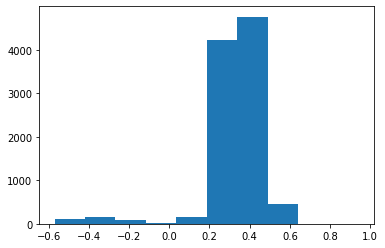

In [7]:
'''
This is a procedure to extract some numerical information from the image. The histogram of a mostly near-coast
water scene.
'''

ndwiPath45Row34_dict = ndwiPath45Row34.sample(numPixels = 10000).reduceColumns(ee.Reducer.toList().repeat(1), ['nd'])
ndwiPath45Row34_list = ee.List(ndwiPath45Row34_dict.get('list'))
ndwiPath45Row34_data = ndwiPath45Row34_list.getInfo()

import matplotlib.pyplot as plt
plt.hist(ndwiPath45Row34_data[0])

In [0]:
def get_images(path_list, row_list, satellite, start_date, end_date, max_cloud_percentage):
  coll = ee.ImageCollection(satellite).filterDate(start_date, end_date)\
            .filter(ee.Filter.inList('WRS_PATH', path_list))\
            .filter(ee.Filter.inList('WRS_ROW', row_list))\
            .filter(ee.Filter.lt('CLOUD_COVER', max_cloud_percentage))
  image_ids = list(map(lambda x: x['id'], coll.getInfo()['features']))

  images = list(map(lambda x: ee.Image(x), image_ids))

  return images

In [0]:
p = [14]
r = [32]
sat = 'LANDSAT/LC08/C01/T1'
sd = '2013-05-01'
ed = '2020-05-01'
cc= 10
image_list = get_images(p, r, sat, sd, ed, cc)

In [7]:
image0 = image_list[0]

parameters = {'min': 0.0,
              'max': 15000,
              'dimensions': 768,
              'bands': ['B4', 'B3', 'B2']
}

Image(url = image0.getThumbUrl(parameters))

In [0]:
len(image_list)

34

In [0]:
def get_imagecollection(path_list, row_list, satellite, start_date, end_date, max_cloud_percentage):
  coll = ee.ImageCollection(satellite).filterDate(start_date, end_date)\
            .filter(ee.Filter.inList('WRS_PATH', path_list))\
            .filter(ee.Filter.inList('WRS_ROW', row_list))\
            .filter(ee.Filter.lt('CLOUD_COVER', max_cloud_percentage))

  return coll

def addndvi(image):
	return image.normalizedDifference(['B5','B4'])
 
def conditional(image):
	return ee.Algorithms.If(ee.Number(image.get('SUN_ELEVATION')).gt(40), image, ee.Image(0))

In [0]:
imagecollection = get_imagecollection(p, r, sat, sd, ed, cc)

In [0]:
imgcollndvi = imagecollection.map(addndvi).limit(3).getInfo()

In [0]:
type(image0)

ee.image.Image

In [12]:
parameters = {'min': -1.0,
              'max': 1.0,
              'dimensions': 768,
              'bands': ['nd'],
              'palette': ['blue', 'white', 'green'],
              'region': ee.Geometry.Rectangle([-74.04, 40.69, -73.82, 40.94])
}

image0ndvi = image0.normalizedDifference(['B5', 'B4'])

Image(url = image0ndvi.getThumbUrl(parameters))

In [13]:
for image in image_list:
  imagendvi = image.normalizedDifference(['B5', 'B4'])
  display(Image(url = imagendvi.getThumbUrl(parameters)))

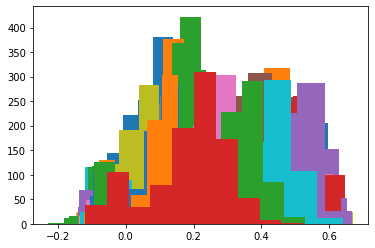

In [0]:
import matplotlib.pyplot as plt
f, ax1 = plt.subplots(1,figsize=(6,4))

for image in image_list:
  imagendvi = image.normalizedDifference(['B5', 'B4'])
  imagendvi_dict = imagendvi.sample(numPixels = 1000).reduceColumns(ee.Reducer.toList().repeat(1), ['nd'])
  imagendvi_list = ee.List(imagendvi_dict.get('list'))
  imagendvi_data = imagendvi_list.getInfo()
  ax1.hist(imagendvi_data[0])


In [14]:
parameters = {'min': -1.0,
              'max': 1.0,
              'dimensions': 768,
              'bands': ['nd'],
              'palette': ['green', 'white', 'blue'],
              'region': ee.Geometry.Rectangle([-74.04, 40.69, -73.82, 40.94])
}

for image in image_list:
  imagendwi = image.normalizedDifference(['B3', 'B6'])
  display(Image(url = imagendwi.getThumbUrl(parameters)))

In [0]:
#First attempt at clustering. Big failure.
studysite = ee.Geometry.Rectangle([-74.04, 40.69, -73.82, 40.94]);

image0ndwi = image0.normalizedDifference(['B3', 'B6'])

training = image0ndwi.sample(numPixels = 100000);

clusterer = ee.Clusterer.wekaKMeans(9).train(training);

clusterfluster = image0ndwi.cluster(clusterer)

In [32]:
#displaying the cluster result - big failure
parameters = {'min': 0.0,
              'max': 12.0,
              'dimensions': 768,
              #'palette': ['brown', 'white', 'blue'],
              'region': ee.Geometry.Rectangle([-74.04, 40.69, -73.82, 40.94])
}
Image(url = clusterfluster.getThumbUrl(parameters))

In [9]:
#Displaying one of the water NDVI images from earlier.
parameters = {'min': -0.5,
              'max': 0.3,
              'dimensions': 768,
              #'palette': ['brown', 'white', 'blue'],
              'region': ee.Geometry.Rectangle([-74.04, 40.69, -73.82, 40.94])
}
Image(url = image0ndwi.getThumbUrl(parameters))

(array([ 14.,  93., 278., 326.,  97.,  31.,   3.,  20., 124.,  14.]),
 array([-0.26055957, -0.20880255, -0.15704553, -0.10528851, -0.05353149,
        -0.00177447,  0.04998254,  0.10173956,  0.15349658,  0.2052536 ,
         0.25701062]),
 <a list of 10 Patch objects>)

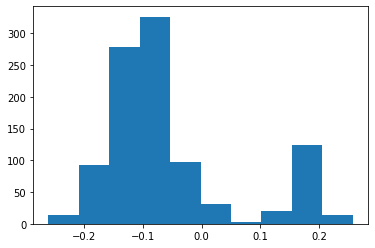

In [15]:
#Plotting the histogram of values of the NDWI image to estimate which values correspond to water. 
imagendwi_dict = image0ndwi.sample(region=ee.Geometry.Rectangle([-74.04, 40.69, -73.82, 40.94]), scale = 30.0, numPixels = 1000).reduceColumns(ee.Reducer.toList().repeat(1), ['nd'])
imagendwi_list = ee.List(imagendwi_dict.get('list'))
imagendwi_data = imagendwi_list.getInfo()
plt.hist(imagendwi_data[0])

In [23]:
#Creating a water mask  based on the histogram shown earlier.
waterthreshold = 0.1;
watermask = image0ndwi.gte(waterthreshold) #creating a water mask. Any NDWI greater than waterthreshold value is taken to be water.

parameters = {'min': -0.5,
              'max': 0.4,
              'dimensions': 768,
              #'palette': ['brown', 'white', 'blue'],
              'region': ee.Geometry.Rectangle([-74.04, 40.69, -73.82, 40.94])
}
Image(url = watermask.getThumbUrl(parameters))

In [0]:
#What is in the watermask?
watermask_data = ee.List(watermask.sample(numPixels = 1000).reduceColumns(ee.Reducer.toList().repeat(1), ['nd']).get('list')).getInfo()


(array([659.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  31.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

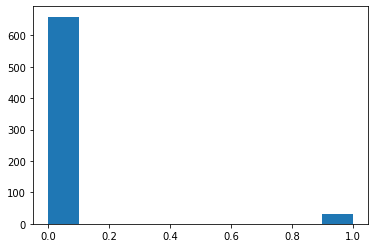

In [37]:
plt.hist(watermask_data) # You can see that the mask is a contrast - greater than threshold is categorized as 1 and the rest as 0. 

In [32]:
watermask.getInfo()['bands'] #Question: how can I use this mask as a training to cluster the image?

[{'crs': 'EPSG:32618',
  'crs_transform': [30, 0, 393285, 0, -30, 4575615],
  'data_type': {'max': 1, 'min': 0, 'precision': 'int', 'type': 'PixelType'},
  'dimensions': [7641, 7431],
  'id': 'nd'}]